# APIs without registration

To work on this part, we are going to scrape data related to currency exchanges using an API that provides the exchange rate (_currency exchange rates_) published by the European Central Bank.

API documentation is available at: https://exchangeratesapi.io

## Explain how to works

In [1]:
# load packages
import requests 
import json

url_base = "http://api.exchangeratesapi.io"
url_param = "/latest?access_key=983ace1935a54481f26a38e76465677a" # latest currency conversion values to euro

response = requests.get(url_base+url_param)
response.status_code

200

In [2]:
# Checking if the request went through ok
response.ok

True

In [ ]:
print(json.dumps(response.json(), indent=4))
print ('\n\nThe dictionary keys are:\n'+str( response.json().keys()) )

Starting from the base URL, by modifying the parameters of the url, it is possible to obtain the conversion from the euro to other currencies on a given date, the conversion between two different currencies on a given date, and even the temporal evolution of said conversion for a specific date. specified period of time.

### Example, To know the euro ratios of April 20, 2021, the request would be as follows:

In [4]:
url_base = "http://api.exchangeratesapi.io"
# Currency conversion values to the euro on 2020-04-04 (the default currency considered is the EURO, therefore, it is not necessary to specify it)
url_param= "/2021-04-20?access_key=983ace1935a54481f26a38e76465677a" 

response = requests.get(url_base+url_param)

# Check the status of the request
print('Response Status:', response.status_code)

# Print results
print(json.dumps(response.json(), indent=4))

Response Status: 200
{
    "success": true,
    "timestamp": 1618963199,
    "historical": true,
    "base": "EUR",
    "date": "2021-04-20",
    "rates": {
        "AED": 4.419936,
        "AFN": 93.315445,
        "ALL": 123.03403,
        "AMD": 627.985926,
        "ANG": 2.159339,
        "AOA": 791.500412,
        "ARS": 111.886286,
        "AUD": 1.558062,
        "AWG": 2.164721,
        "AZN": 2.044494,
        "BAM": 1.9527,
        "BBD": 2.428907,
        "BDT": 102.006813,
        "BGN": 1.955709,
        "BHD": 0.45368,
        "BIF": 2370.484208,
        "BMD": 1.203291,
        "BND": 1.597852,
        "BOB": 8.306587,
        "BRL": 6.701373,
        "BSD": 1.202972,
        "BTC": 2.1320729e-05,
        "BTN": 90.23508,
        "BWP": 12.998268,
        "BYN": 3.114508,
        "BYR": 23584.512928,
        "BZD": 2.424814,
        "CAD": 1.517669,
        "CDF": 2402.972676,
        "CHF": 1.102341,
        "CLF": 0.030395,
        "CLP": 838.694483,
        "CNY": 7.8

## Currency Converter

In [31]:
# Load libraries
import requests 
import json
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

# Define base url 
url_base = "http://api.exchangeratesapi.io"

In [32]:
# Get the values of the parameters entered by the user and store them in variables
date = "2021-06-21"
base= "EUR"
curr = "USD"
amount= 47
api_key = "51c333a75007c6b1f576b4f7ef051dd1"

### Build URLs based on user parameters to make requests to the server and get responses to convert the amount on the given date.

In [33]:
url1 = url_base + "/" + date + "?access_key=" + api_key + "&base=" + base + "&symbols=" + curr
response1 = requests.get(url1)

if(response1.ok is False):
  print("\nError {}:".format(response1.status_code))
  print(response1.json()['error'])

else:
  data = response1.json()
  rate = data['rates'][curr]
  result = amount*rate
  
  print("\n{0} {1} equal to {2} {3}, based on change to date ({4})".format(amount,base,result,curr,data['date']))


47 EUR equal to 55.986729 USD, based on change to date (2021-06-21)


### Get latest conversion rate

In [34]:
url2 = url_base + "/latest" + "?access_key=" + api_key + "&base=" + base + "&symbols=" + curr
response2 = requests.get(url2)

if(response2.ok is False):
  print("\nError {}:".format(response2.status_code))
  print(response2.json()['error'])

else:
  data = response2.json()
  rate = data['rates'][curr]    
  result = amount*rate    
  print("\n{0} {1} equal to {2} {3}, based on change to date ({4}) ".format(amount,base,result,curr,data['date']))


47 EUR equal to 47.568418 USD, based on change to date (2022-09-12) 


### To obtain the evolution of the conversion rate from the last year with respect to the date indicated by the user

In [35]:
# you can be changed if desired
i_date = "2021-01-01" 
f_date = "2021-12-31" 

In [36]:
dates = pd.date_range(start= i_date ,end= f_date)
info=[]
for date in dates:
    aux_date=str(date)
    aux_date=aux_date[:10]
    url3 = url_base + "/" + aux_date +  "?access_key=" + api_key + "&base=" + base + "&symbols=" + curr
    response3 = requests.get(url3)
    data = response3.json()
    info.append(data)

### Results

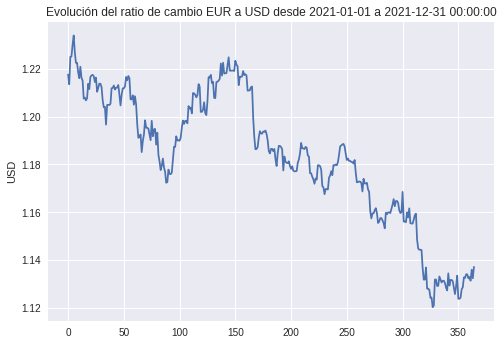

During the graphed period, the date with the highest conversion rate is  2021-01-06 00:00:00  worth  1.233953
During the graphed period, the date with the lowest conversion ratio is  2021-11-24 00:00:00  worth  1.120273

Day 2021-11-24 the currency with the highest conversion ratio with the base currency EUR was VEF (value=  239548197945.39713 ).
Day  2021-11-24  the currency with the lowest conversion ratio with the base currency EUR  was  BTC  (value=  1.9587498e-05 ).


In [37]:
# Summary
df = pd.DataFrame(info, columns = ['success', 'timestamp','historical','base','date', 'rates'])
df.index=pd.to_datetime(df['date'])
rates = df['rates']

df1 = pd.DataFrame([[key, rates[key][curr]] for key in rates.keys()], columns=['Date', 'rate'])

# Graphic
plt.figure()
plt.title("Evolución del ratio de cambio {0} a {1} desde {2} a {3}".format(base,curr,i_date,date))
plt.plot(df1['rate'])
plt.ylabel(curr)
plt.show()


# Max and Min values
max_value= df1['rate'].max()
max_date= df1[df1['rate']==df1['rate'].max()].values[0][0]
min_value=df1['rate'].min()
min_date= df1[df1['rate']==df1['rate'].min()].values[0][0]
print('During the graphed period, the date with the highest conversion rate is ',max_date , ' worth ', max_value )
print('During the graphed period, the date with the lowest conversion ratio is ',min_date , ' worth ', min_value )


# With max date
# Currency conversion values to the euro (the default currency considered is the EURO, therefore, it is not necessary to specify it)
url_param = "/" + str(min_date)[:10] + "?access_key=" + api_key 

respuesta4 = requests.get(url_base+url_param)
data4= respuesta4.json()['rates']

df_divisas=pd.DataFrame()
df_divisas['valuta']=list(data4.keys())
df_divisas['ratio']=list(data4.values())

#maximo valor
max_value2=df_divisas[df_divisas['ratio']==df_divisas['ratio'].max()].values[0][1]
max_divisa2=df_divisas[df_divisas['ratio']==df_divisas['ratio'].max()].values[0][0]

#minimoo valor
min_value2=df_divisas[df_divisas['ratio']==df_divisas['ratio'].min()].values[0][1]
min_divisa2=df_divisas[df_divisas['ratio']==df_divisas['ratio'].min()].values[0][0]

print('\nDay '+ str(min_date)[:10] + ' the currency with the highest conversion ratio with the base currency '+ base+ ' was '+ max_divisa2+ ' (value= ', str(max_value2), ').')
print('Day ', str(min_date)[:10] , ' the currency with the lowest conversion ratio with the base currency', base, ' was ', min_divisa2 ,' (value= ', str(min_value2), ').')